In [1]:
#check_results.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#evolve a handful of particles having 1e-6 < e < 1e-2 particles for 2e4 orbits
#and show that the fractional variations in a,e,wt are tiny

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})
sns.set(font_scale=1.5, font='DejaVu Sans')

In [3]:
#restore saved data & compare
from helper_fns import *
execfile('inputs.py')
a, e, wt, M, times = restore_output(output_folder)
r, t, vr, vt = elem2coords(J2, Rp, a, e, wt, M, sort_particle_longitudes=False)

In [4]:
#show that a is unchanged
delta = np.zeros_like(a)
for tm in range(len(times)):
    delta[tm] = a[tm] - a[0]
print np.abs(delta).max()

0.0


In [5]:
#compute maximum change in e
de = np.zeros_like(e)
for tm in range(len(times)):
    de[tm] = e[tm] - e[0]
print np.abs(de).max()

1.14867935042e-12


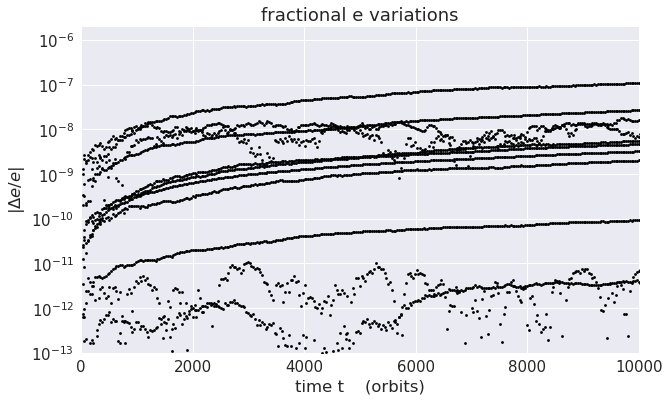

In [6]:
#plot de/e vs time
f, ax = plt.subplots(figsize=(10, 6))
for tm in range(len(times)):
    de = np.abs(e[tm] - e[0])/e[0]
    time = np.zeros_like(de) + times[tm]/(2.0*np.pi)
    p = sns.regplot(time, de, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's': 8}, marker='o', color='black')
ax.set_yscale('log')
ax.set_xlim(0, 1.0e4)
ax.set_ylim(1.0e-13, 2.0e-6)
ax.set_title('fractional e variations')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('$|\Delta e/e|$')

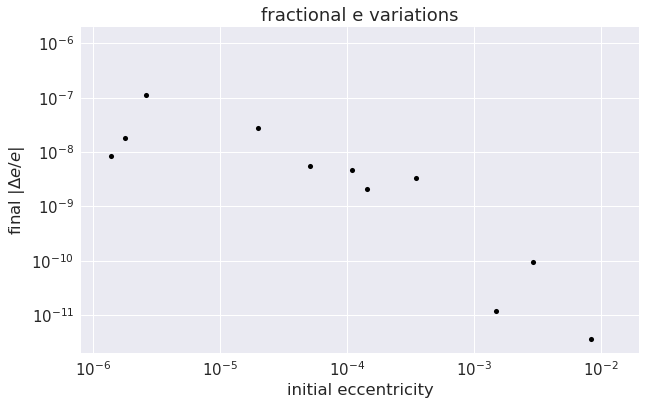

In [7]:
#plot final |de/e| versus initial e
f, ax = plt.subplots(figsize=(10, 6))
de = np.abs(e[-1] - e[0])/e[0]
p = sns.regplot(e[0], de, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's': 26}, marker='o', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.0e-7, 2.0e-2)
ax.set_ylim(2.0e-12, 2.0e-6)
ax.set_title('fractional e variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('final $|\Delta e/e|$')

In [8]:
#compute maximum change in wt
dwt = np.zeros_like(wt)
for tm in range(len(times)):
    dwt[tm] = wt[tm] - wt[0]
print np.abs(dwt).max()

2.31137020634e-08


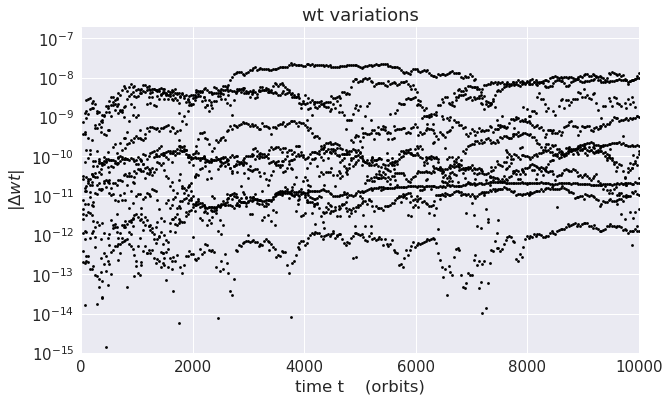

In [9]:
#plot dwt vs time
f, ax = plt.subplots(figsize=(10, 6))
for tm in range(len(times)):
    dwt = np.abs(wt[tm] - wt[0])
    time = np.zeros_like(dwt) + times[tm]/(2.0*np.pi)
    p = sns.regplot(time, dwt, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's': 8}, marker='o', color='black')
ax.set_yscale('log')
ax.set_xlim(0, 1.0e4)
ax.set_ylim(1.0e-15, 2.0e-7)
ax.set_title('wt variations')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('$|\Delta wt|$')

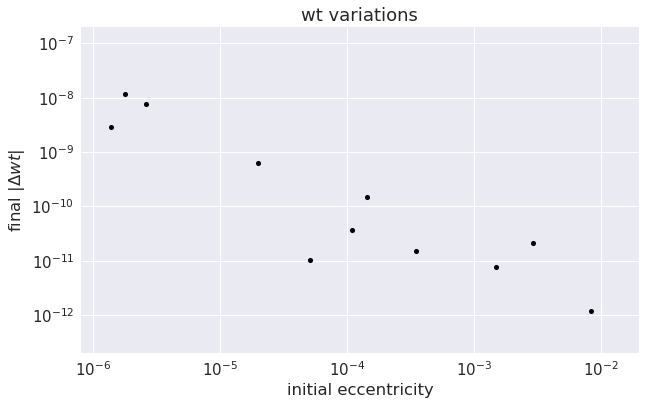

In [10]:
#plot final |dwt| versus initial e
f, ax = plt.subplots(figsize=(10, 6))
dwt = np.abs(wt[-1] - wt[0])
p = sns.regplot(e[0], dwt, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's': 26}, marker='o', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.0e-7, 2.0e-2)
ax.set_ylim(2.0e-13, 2.0e-7)
ax.set_title('wt variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('final $|\Delta wt|$')